
# Real-Time Communication System Powered By AI For Specially Abled


Image Preprocessing

Import ImageDataGenerator Library And Configure It

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [25]:
test_datagen=ImageDataGenerator(rescale=1./255)

Apply ImageDataGenerator Functionality To Train And Test Set

In [26]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM-Project-321-1658278283-main/Data Collection/Train_Set",target_size=(64,64),
                                          class_mode="categorical",batch_size=30)

Found 14928 images belonging to 9 classes.


In [27]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM-Project-321-1658278283-main/Data Collection/Test_set",target_size=(64,64),
                                                            class_mode="categorical",batch_size=30)

Found 2250 images belonging to 9 classes.


Model  Building

Import The Required Model Building Libraries

In [28]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

Initialize The Model

In [29]:
model=Sequential()

Add The Convolution Layer

In [30]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))
#No of feature detectors, size of feature detector, image size, activation function

Add The Pooling Layer

In [31]:
model.add(MaxPooling2D(pool_size=(2,2)))

Add The Flatten Layer

In [32]:
model.add(Flatten())

Adding The Dense Layers

In [33]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [34]:
model.add(Dense(9,activation="softmax"))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_3 (Dense)             (None, 300)               9225900   
                                                                 
 dense_4 (Dense)             (None, 150)               45150     
                                                                 
 dense_5 (Dense)             (None, 9)                 1359      
                                                      

Compile The Model

In [36]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [37]:
len(x_train)

498

In [38]:
len(x_test)

75

In [39]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

Fit And Save The Model

In [40]:
model.fit(x_train,epochs=12,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/12
498/498 [==============================] - 121s 242ms/step - loss: 0.2928 - accuracy: 0.9045 - val_loss: 0.2593 - val_accuracy: 0.9778
Epoch 2/12
498/498 [==============================] - 110s 221ms/step - loss: 0.0789 - accuracy: 0.9756 - val_loss: 0.3849 - val_accuracy: 0.9644
Epoch 3/12
498/498 [==============================] - 111s 222ms/step - loss: 0.0542 - accuracy: 0.9818 - val_loss: 0.3984 - val_accuracy: 0.9640
Epoch 4/12
498/498 [==============================] - 110s 222ms/step - loss: 0.0435 - accuracy: 0.9857 - val_loss: 0.6294 - val_accuracy: 0.9164
Epoch 5/12
498/498 [==============================] - 110s 221ms/step - loss: 0.0432 - accuracy: 0.9842 - val_loss: 0.3731 - val_accuracy: 0.9680
Epoch 6/12
498/498 [==============================] - 110s 221ms/step - loss: 0.0333 - accuracy: 0.9878 - val_loss: 0.5432 - val_accuracy: 0.9498
Epoch 7/12
498/498 [==============================] - 111s 222ms/step - loss: 0.0334 - accuracy: 0.9879 - val_loss: 0.3443 -

In [41]:
model.save("C:/Users/rajes/Downloads/signlanguage-new.h5")

Test the Model

Import The Packages And Load The Saved Model

In [42]:
from keras.models import load_model
import numpy as np
import h5py
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [43]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

In [44]:
model = load_model("C:/Users/rajes/Downloads/signlanguage-new.h5")

Load The Test Image, Pre-Process It And Predict

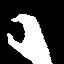

In [46]:
img =image.load_img(r"/content/drive/MyDrive/IBM-Project-321-1658278283-main/Data Collection/Test_set/C/1.png",target_size = (64,64,1))
img

In [47]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [48]:
from skimage.transform import resize
def detect(frame):
    img=resize(frame,(64,64,1))
    img=np.expand_dims(img,axis=0)
    if(np.max(img)>1):
        img=img/255.0
        prediction=model.predict(img)
        print(prediction)
        prediction=model.predict_classes(img)
        print(prediction)

In [49]:
frame=cv2.imread(r"/content/drive/MyDrive/IBM-Project-321-1658278283-main/Data Collection/Test_set/A/10.png")
data=detect(frame)

In [50]:
type(img)

PIL.Image.Image

In [51]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [52]:
x.shape

(64, 64, 3)

In [53]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [54]:
pred_prob = model.predict(x)

1/1 [==============================] - 0s 264ms/step


In [55]:
pred_prob

array([[0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [56]:
class_name=["A","B","C","D","E","F","G","H","I"]
pred_id = pred_prob.argmax(axis=1)[0]

In [57]:
pred_id

2

In [58]:
print("the alphabet is  ",str(class_name[pred_id]))

the alphabet is   C


CNN Video Anlaysis

In [59]:
background = None
accumulated_weight = 0.5

ROI_top = 100
ROI_bottom = 300
ROI_right = 150
ROI_left = 350

In [60]:
word_dict = { 0:'A', 1:'B',  2:'C', 3: 'D', 4:'E', 5:'F', 6:'G',7:'H', 8:'I' }
'''
predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')

plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')'''

'\npredictions = model.predict(imgs, verbose=0)\nprint("predictions on a small set of test data--")\nprint("")\nfor ind, i in enumerate(predictions):\n    print(word_dict[np.argmax(i)], end=\'   \')\n\nplotImages(imgs)\nprint(\'Actual labels\')\nfor i in labels:\n    print(word_dict[np.argmax(i)], end=\'   \')'

In [61]:
def cal_accum_avg(frame, accumulated_weight):

    global background
    
    if background is None:
        background = frame.copy().astype("float")
        return None

    cv2.accumulateWeighted(frame, background, accumulated_weight)

In [62]:
def segment_hand(frame, threshold=25):
    global background
    diff = cv2.absdiff(background.astype("uint8"), frame)
    _ , thresholded = cv2.threshold(diff, threshold,255,cv2.THRESH_BINARY)
    #Fetching contours in the frame (These contours can be of hand or any other object in foreground) …
    contours, hierarchy =cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    # If length of contours list = 0, means we didn't get any contours...
    if len(contours) == 0:
        return None
    else:
        # The largest external contour should be the hand 
        hand_segment_max_cont = max(contours, key=cv2.contourArea)
        
        # Returning the hand segment(max contour) and the thresholded image of hand...
        return (thresholded, hand_segment_max_cont)